# GDP and Life Expectancy 

## Introduction

For this project, we will act as a data researcher for the **I**nternational **H**eadquarter of **E**mpathy **A**nd **L**ogic (**IHEAL**). We will be helping them analyze data on GDP and life expectancy from the World Health Organization and the World Bank to support their case that there is a correlation or pattern between the GDP and life expectancy of a country.

During this project, we will analyze, prepare, and plot data, and seek to answer questions in a meaningful way.

**Is there a correlation between GDP and life expectancy of a country?**

GDP Source:[World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD)   national accounts data, and OECD National Accounts data files.

Life expectancy Data Source: [World Health Organization](vhttp://apps.who.int/gho/data/node.main.688)

In [8]:
# Import libraries 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [9]:
gdp = pd.read_csv('all_data.csv')
print(gdp.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


- GDP stands for **G**ross **D**omestic **P**roduct. GDP is a monetary measure of the market value of all final goods and services produced in a time period. 
- The GDP values are in current US dollars.

#### What five countries are represented in the data?

In [10]:
countries = pd.unique(gdp['Country'])
print(countries)

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


#### What years are represented in the data?

In [11]:
years = pd.unique(gdp['Year'])
print(years)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


#### How many rows are there for each country? 


In [12]:
chile_count = pd.value_counts(gdp['Country'] == 'Chile')
china_count = pd.value_counts(gdp['Country'] == 'China')
germany_count = pd.value_counts(gdp['Country'] == 'Germany')
us_count = pd.value_counts(gdp['Country'] == 'United States of America')
zimbabwe_count = pd.value_counts(gdp['Country'] == 'Zimbabwe')
print('Number of rows for Chile: ',chile_count[1])
print('Number of rows for China: ',china_count[1])
print('Number of rows for Germany: ',germany_count[1])
print('Number of rows for United States of America: ',us_count[1])
print('Number of rows for Zimbabwe: ',zimbabwe_count[1])

Number of rows for Chile:  16
Number of rows for China:  16
Number of rows for Germany:  16
Number of rows for United States of America:  16
Number of rows for Zimbabwe:  16


- They all have 16 columns each

#### What determines the order that each country rows entry is in? 
- The order of the year 

## Visualization of GDP over time
We want to compare the GDP's of the countries over time, in order to eventually look for a correlation between GDP and life expectancy.

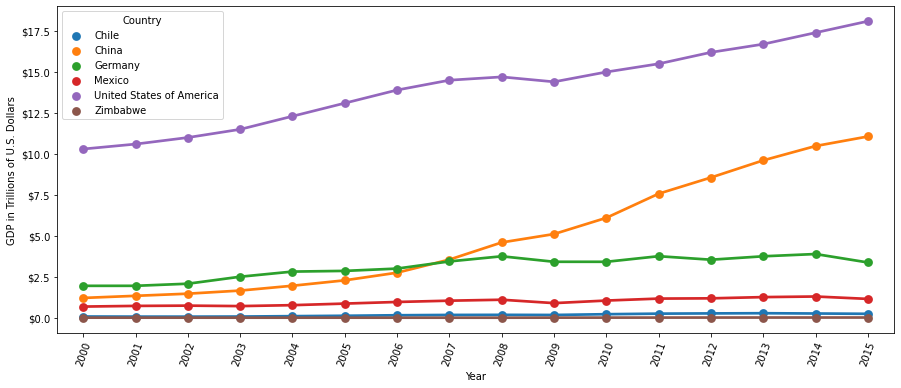

In [13]:
from matplotlib.ticker import FuncFormatter
def trillions(x, pos):
    'The two args are thr value and tick position'
    return '$%1.1f' % (x*1e-12)

formatter = FuncFormatter(trillions)

f, ax = plt.subplots(figsize=(15,6))
ax = sns.pointplot(x='Year', y = 'GDP', hue = 'Country', data = gdp)
plt.xticks(rotation = 70)
ax.yaxis.set_major_formatter(formatter)
ax.set(ylabel = 'GDP in Trillions of U.S. Dollars')
plt.show()

- Which countries' line changes the most?
  
  China's lines is the one who changes the most over time; around 2006, the GDP started to rise almost exponentially

- What years are the biggest changes in data?
  
  Around 2009 and 2015 we see the most changes in GDP for some of these countries

- Which country has has the least chsnge in GDP over time?
  
  Zimbabwe has been the country with the least changes of GDP over time, their line seems statical over the years. 

- Can we think of any reason that the data looks like this for particular countries?

    For China and The United States thir GDP's have grown bigger because they have growing economies, most for China ho had the biggest change in GDP over time. While other countris stay stable like Germany and Mexico; Zimbabwe and Chile remain with a low GDP over time 


## Visualization of Life Expectancy at birth over time 

Now we are going to compare the life expectancy of each cpuntry over time to see the trends. 

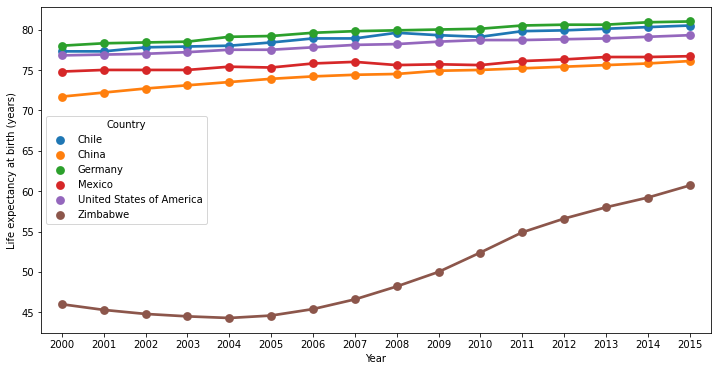

In [14]:
f, ax = plt.subplots(figsize = (12,6))
ax = sns.pointplot(x = 'Year', y = "Life expectancy at birth (years)", hue = "Country", data = gdp)
ax.set(ylabel = "Life expectancy at birth (years)")
plt.show()

- Which countries' line changes the most?
  
    Zimbabwe's line started really low compared to the other countries but over time increased drastically, it is still lower than the rest of the countries, but it is a start.

- What years are there the biggest changes in the data?

    Zimbabwe would be the biggest change in the data, also China's life expectancy increased over time. 

- Which country had the least change in life expectancy over time?

    I would say that Mexico has the lowest change over time, it almost seems statical their line. 

- Can we think of any reasons that the data looks like this for particular countries?

    Zimbabwe had the lowest life expectancy because they had the lowest GDP too and their country is still in development, but they are increasing that life expectancy over time. The other countries who had stronger economies first had the highest life expectancy at the start of the data, and they were increasing it more over time. 

## Visualization of the correlation of GDP and Life Expectancy

Now we want to see how the GDP of a country correlates with their life expectancy. 

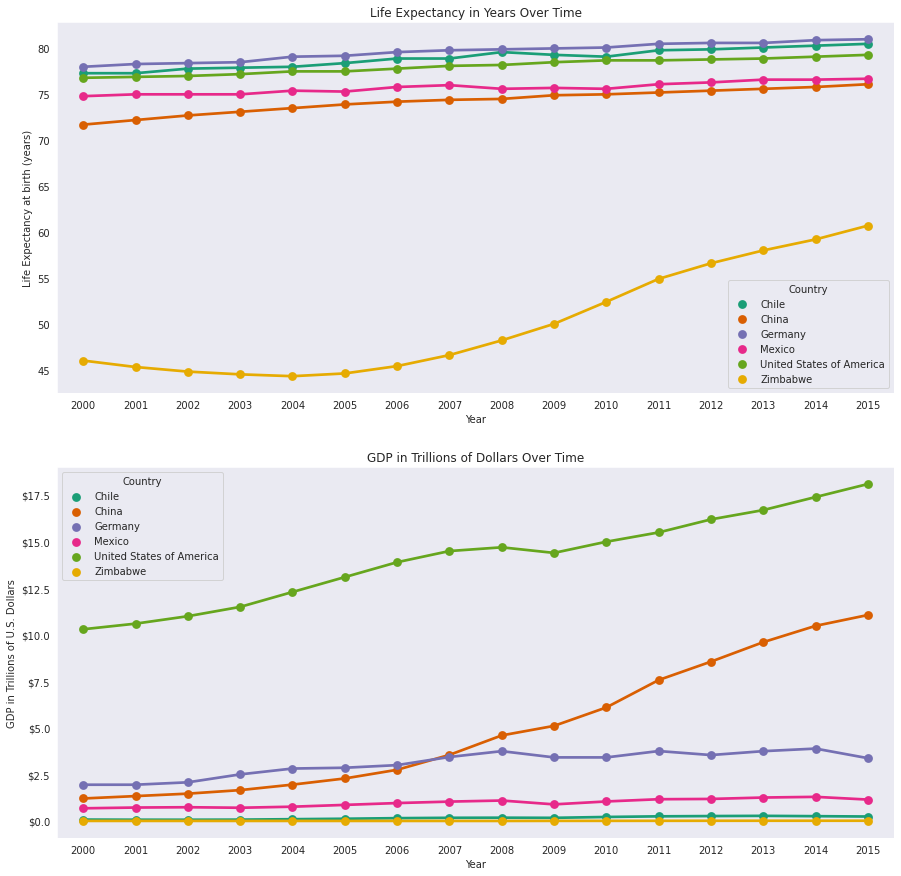

In [21]:
sns.set_style("dark")
f, (ax1, ax2) = plt.subplots(2,1, figsize = (15,15))
sns.set_palette("Dark2")
ax1 = sns.pointplot(x = 'Year', y = 'Life expectancy at birth (years)', hue = "Country", data = gdp, ax = ax1)
ax2 = sns.pointplot(x = 'Year', y = 'GDP', hue = 'Country', data = gdp, ax = ax2)
ax2.yaxis.set_major_formatter(formatter)
ax1.set(ylabel = "Life Expectancy at birth (years)")
ax2.set(ylabel = "GDP in Trillions of U.S. Dollars")
ax2.set_title("GDP in Trillions of Dollars Over Time")
ax1.set_title("Life Expectancy in Years Over Time")
plt.show()

- Which countries have the highest and lowest GDP?

    The United States has the highest GDP and Zimbabwe has the lowest one. 

- Which countries have the highest and lowest life expectancy?

    Germany has the highest life expectancy and Zimbabwe has the lowest life expectancy 

**Conclusion:** GDP and life expectancy in countries do correlate because the countries with the highest life expectancy also have the highest GDP while the country with the lowest GDP also has the lowest life expectancy
